In [12]:
import pickle
from pathlib import Path
import haiku as hk
import jax.numpy as jnp
from jaxpm.nn import CNN
from jax.experimental.ode import odeint
import jax_cosmo as jc
from jaxpm.painting import cic_paint, cic_read, compensate_cic
from jaxpm.utils import power_spectrum
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import sys
sys.path.append("../")

from read_data import get_data


In [15]:
mesh_lr = 32
mesh_hr = 64
data_dir = Path(f"/n/holystore01/LABS/itc_lab/Users/ccuestalazaro/pm2nbody/data/matched_{mesh_lr}_{mesh_hr}/")
box_size = 256.0
n_sims = 1

pos_hr, vel_hr, pot_hr = get_data(
    data_dir=data_dir,
    n_mesh=mesh_hr,
    downsampling_factor=mesh_hr // mesh_lr,
)
pos_lr, vel_lr, pot_lr = get_data(
    data_dir,
    mesh_lr,
    n_sims,
)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [21]:
pos_hr.max()

Array(1.01181779, dtype=float64)

Text(0.5, 1.0, 'HR')

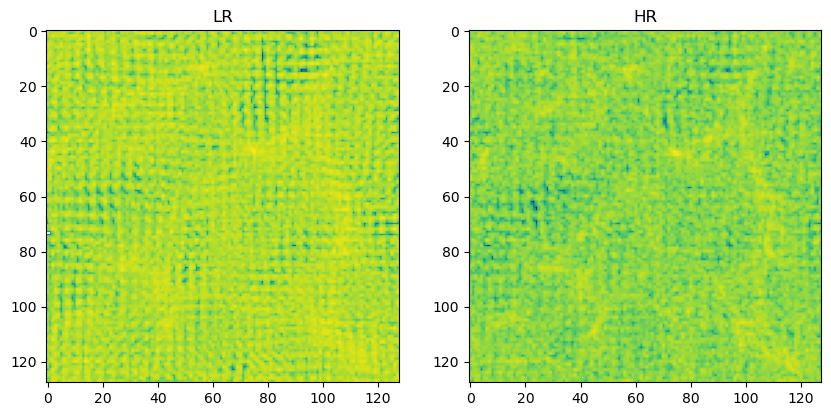

In [25]:
mesh_plot = 64 
delta_hr = cic_paint(jnp.zeros((mesh_plot, mesh_plot, mesh_plot)), pos_hr[-1]*mesh_plot)
delta_lr = cic_paint(jnp.zeros((mesh_plot, mesh_plot, mesh_plot)), pos_lr[-1]*mesh_plot)
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow((delta_lr[:,:,:]).sum(axis=0),
           norm=LogNorm())
ax[1].imshow((delta_hr[:,:,:]).sum(axis=0),
           norm=LogNorm())
ax[0].set_title("LR")
ax[1].set_title("HR")